### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Reading the dataset**

In [2]:
air=pd.read_csv('AB_NYC_2019.csv')

### An overview of the dataset

In [5]:
air.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
air.shape

(48895, 16)

In [7]:
air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
air.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Description about the columns host_id and host_name through describe() function

In [11]:
air['host_id'].describe()

count    4.889500e+04
mean     6.762001e+07
std      7.861097e+07
min      2.438000e+03
25%      7.822033e+06
50%      3.079382e+07
75%      1.074344e+08
max      2.743213e+08
Name: host_id, dtype: float64

In [12]:
air['host_name'].describe()

count       48874
unique      11452
top       Michael
freq          417
Name: host_name, dtype: object

### Data pre-processing of NaN values

In [13]:
air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Visualising the missing data in the dataset through a heat map

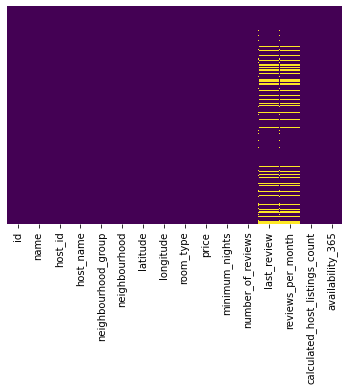

In [14]:
sns.heatmap(air.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (10, 5)

In [15]:
air['last_review']=air['last_review'].fillna(0)
air['reviews_per_month']=air['reviews_per_month'].fillna(0)


### Exploring the categorical columns

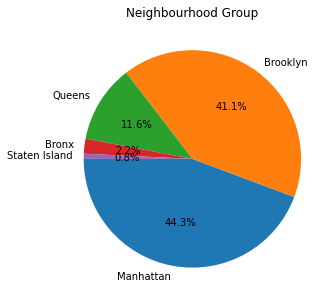

In [16]:
# Visualizing different locations.

plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(air.neighbourhood_group.value_counts(), labels=air.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

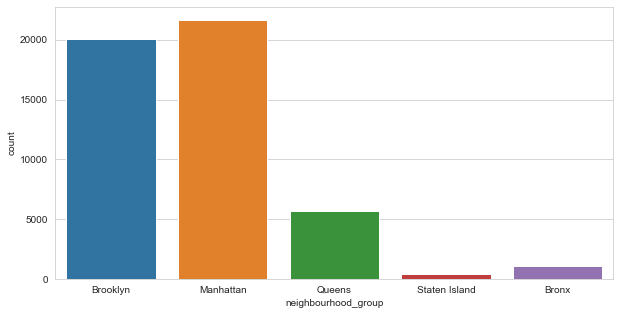

In [17]:
#Visualising the data according to area
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',data=air)

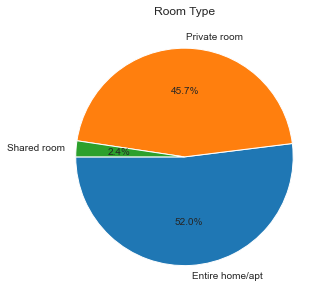

In [18]:
# Visualizing different Room-Types

plt.figure(figsize=(10,5))
plt.title("Room Type")
g = plt.pie(air.room_type.value_counts(), labels=air.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

<AxesSubplot:xlabel='room_type', ylabel='count'>

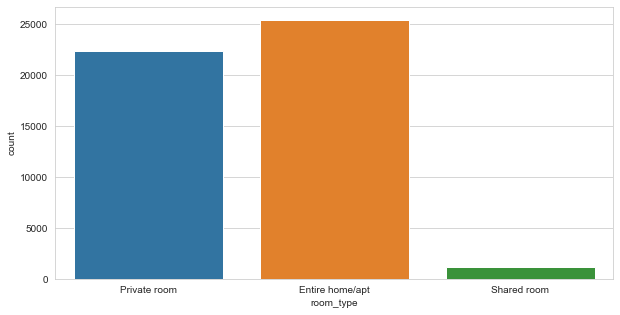

In [19]:
#visualising the data according to room_type
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='room_type',data=air)


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

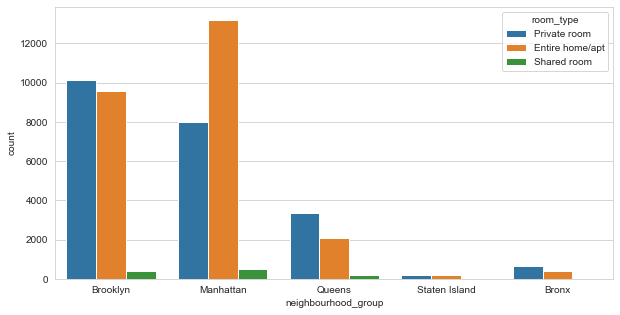

In [20]:
# Visualizing different room-types according to different locations.
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',hue='room_type',data=air)

In [21]:
air[(air['neighbourhood_group']=='Staten Island') & (air['room_type']=='Shared room')].shape

(9, 16)

#### **Filled the NAN values with zeroes so we'll see an empty graph**

<AxesSubplot:>

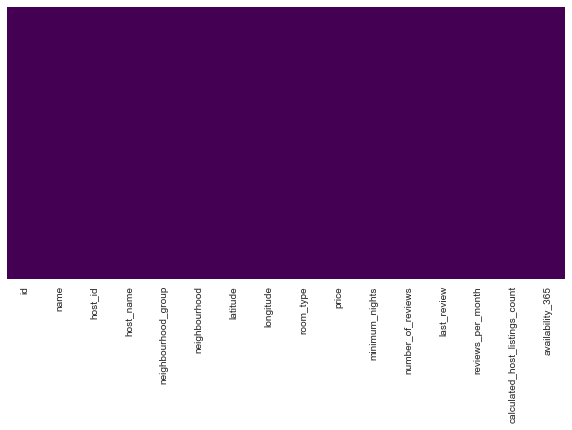

In [22]:
sns.heatmap(air.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
new_air=air[~air['name'].isnull()]

In [24]:
air[air['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,0,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,0,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [25]:
#dropping those rows having null host_name value
new_air=new_air[~new_air['host_name'].isnull()]
new_air.shape

(48858, 16)

In [26]:
# To get the busiest hosts 
new=air.groupby(['host_id','neighbourhood_group'],as_index=True).size()
new=new.sort_values(ascending=False)
new.head(20)

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
12243051   Manhattan               96
16098958   Manhattan               96
61391963   Manhattan               91
22541573   Manhattan               86
137358866  Queens                  79
200380610  Manhattan               65
1475015    Manhattan               52
7503643    Brooklyn                52
120762452  Manhattan               50
205031545  Manhattan               49
2856748    Manhattan               49
190921808  Manhattan               47
2119276    Manhattan               39
26377263   Brooklyn                35
25237492   Manhattan               34
119669058  Brooklyn                34
76104209   Manhattan               33
dtype: int64

<AxesSubplot:title={'center':'Which hosts are the busiest'}, xlabel='host_id', ylabel='count'>

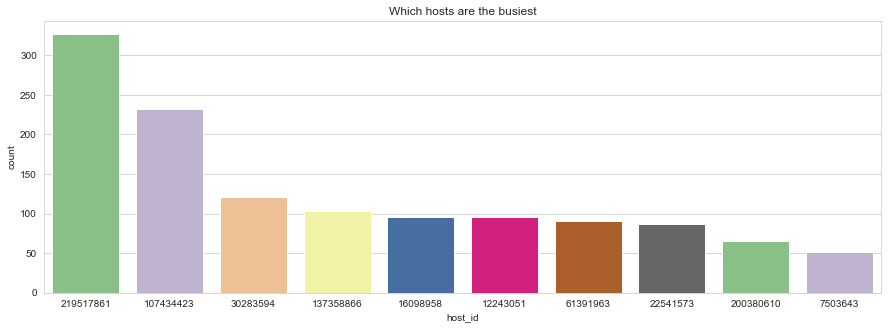

In [27]:
plt.figure(1, figsize=(15, 5))
plt.title("Which hosts are the busiest")
sns.countplot(x = "host_id", order=air['host_id'].value_counts().index[0:10] ,data=air,palette='Accent')

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Maps of neighbourhood_groups'}, xlabel='longitude', ylabel='latitude'>

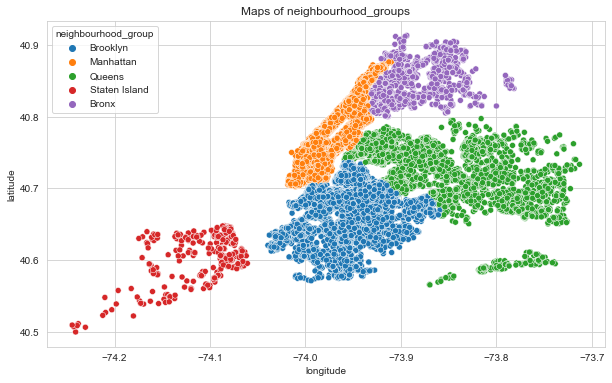

In [28]:
# locations
plt.figure(figsize=(10,6))
plt.title('Maps of neighbourhood_groups')
sns.scatterplot(air.longitude, air.latitude, hue=air.neighbourhood_group)

<AxesSubplot:>

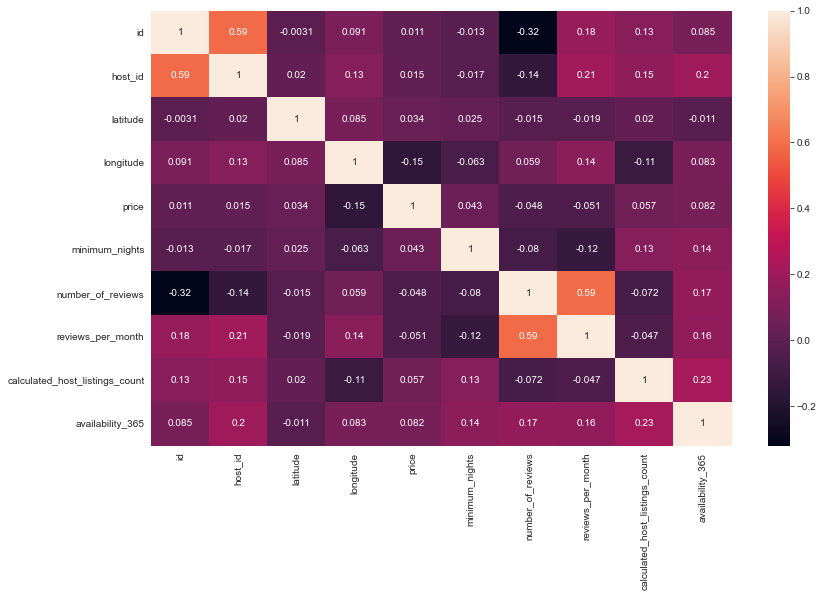

In [29]:
#Get Correlation between different variables

plt.figure(figsize=(13,8))
corr=air.corr(method='pearson')
sns.heatmap(corr, annot=True)

In [30]:
# Let's have a look at our 5 main neighbourhood regions - 

# Brooklyn
neigh_1 = air.loc[air['neighbourhood_group'] == 'Brooklyn']
neigh_price1 = neigh_1[['price']]

# Manhattan
neigh_2 = air.loc[air['neighbourhood_group'] == 'Manhattan']
neigh_price2 = neigh_2[['price']]

# Queens
neigh_3 = air.loc[air['neighbourhood_group'] == 'Queens']
neigh_price3 = neigh_3[['price']]

# Staten Island
neigh_4 = air.loc[air['neighbourhood_group'] == 'Staten Island']
neigh_price4 = neigh_4[['price']]

# Bronx
neigh_5 = air.loc[air['neighbourhood_group'] == 'Bronx']
neigh_price5 = neigh_5[['price']]

price_list = [neigh_price1, neigh_price2, neigh_price3, neigh_price4, neigh_price5]

In [31]:
# Creating an empty list which we will append with statistics & neighbourhood region.
price_dist = []
neighbourhood_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

for i in price_list:
    x = i.describe(percentiles = [.25, .50, .70])
    x = x.iloc[3:]
    x.reset_index(inplace = True)
    x.rename(columns = {'index':'Stats'}, inplace = True)
    price_dist.append(x)

price_dist[0].rename(columns = {'price':neighbourhood_list[0]}, inplace = True)
price_dist[1].rename(columns = {'price':neighbourhood_list[1]}, inplace = True)
price_dist[2].rename(columns = {'price':neighbourhood_list[2]}, inplace = True)
price_dist[3].rename(columns = {'price':neighbourhood_list[3]}, inplace = True)
price_dist[4].rename(columns = {'price':neighbourhood_list[4]}, inplace = True)

stats_df = price_dist
stats_df = [df.set_index('Stats') for df in stats_df]
stats_df = stats_df[0].join(stats_df[1:])
stats_df.style.background_gradient(cmap = 'Reds')

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
70%,130.000000,200.000000,100.000000,100.000000,87.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


In [32]:
# we see manhattan has the highest average(50%) ,followed by brooklyn 

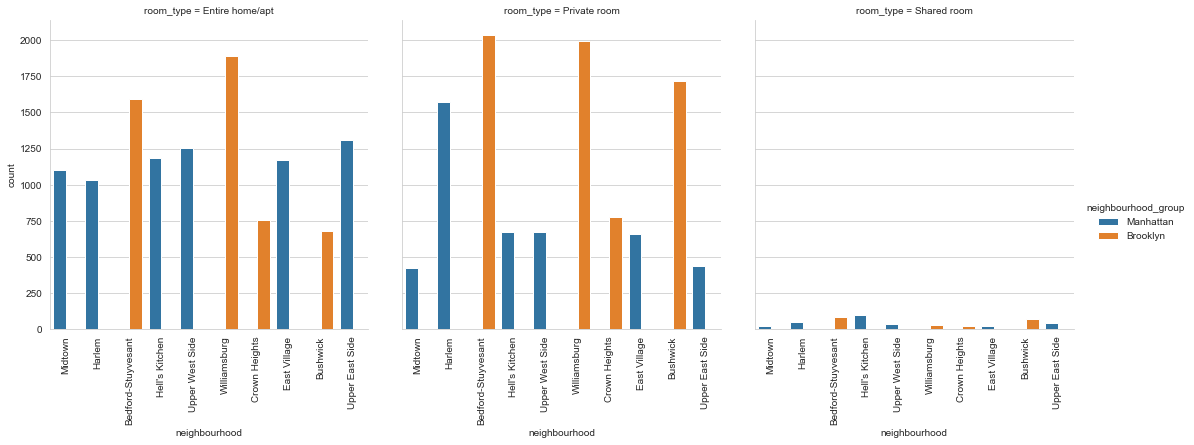

In [33]:
sub_data = air.loc[air['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 
                                           'Bushwick', 'Upper West Side', 'Hell\'s Kitchen', 'East Village',
                                           'Upper East Side', 'Crown Heights', 'Midtown'])]
sns.set_style('whitegrid')
plot = sns.catplot(x = 'neighbourhood', hue = 'neighbourhood_group',
           col= 'room_type', data = sub_data, kind = 'count')
plot.set_xticklabels(rotation = 90)

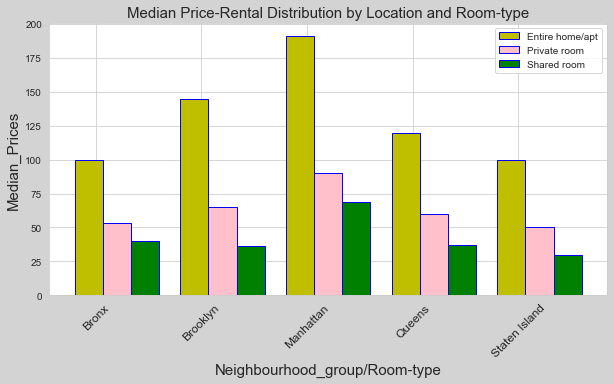

In [34]:
# Analysing Different locations according to their room_type and corresponding median prices¶
#extracting a df from air
price_df = air[['neighbourhood_group','room_type','price']]
#grouping this data frame according to their neighbourhood_group and room_type and assigning median prices
median_price_df =price_df.groupby(['neighbourhood_group','room_type']).median().reset_index()

#getting the unique locations
locations = median_price_df.neighbourhood_group.unique()
x_rooms1 = [0.8, 3.8, 6.8, 9.8, 12.8]
x_rooms2 = [1.6, 4.6, 7.6, 10.6, 13.6]
x_rooms3 = [2.4, 5.4, 8.4, 11.4, 14.4]
y_values1 = median_price_df[median_price_df['room_type'] == 'Entire home/apt']['price'].values
y_values2 = median_price_df[median_price_df['room_type'] == 'Private room']['price'].values
y_values3 = median_price_df[median_price_df['room_type'] == 'Shared room']['price'].values
fig,ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('lightgray')
plt.bar(x_rooms1, y_values1, color='y', edgecolor='b')
plt.bar(x_rooms2, y_values2, color='pink', edgecolor='b')
plt.bar(x_rooms3, y_values3, color='g', edgecolor='b')
ax.set_xticks(range(1,16,3))
ax.set_xticklabels(locations, fontsize='12')
for tick in ax.get_xticklabels():
  tick.set_rotation(45)
plt.xlabel('Neighbourhood_group/Room-type',fontsize='15')
plt.ylabel('Median_Prices', fontsize='15')
plt.legend(labels=median_price_df.room_type.unique(), loc='best')
plt.title('Median Price-Rental Distribution by Location and Room-type',fontsize='15')
plt.show()



In [35]:
# Conclusion

    # Entire-home/apt of every location have higher prices followed by private-rooms and shared-rooms.
    # Manhattan is most demanded location followed by Brooklyn.
    # Manhattan is the costliest location for every room type may be due to their location or high demand followed by Brooklyn .
    # The price for private-room rentals of Manhattan is somewhat in the same range of entire-home/apt rentals of other locations.

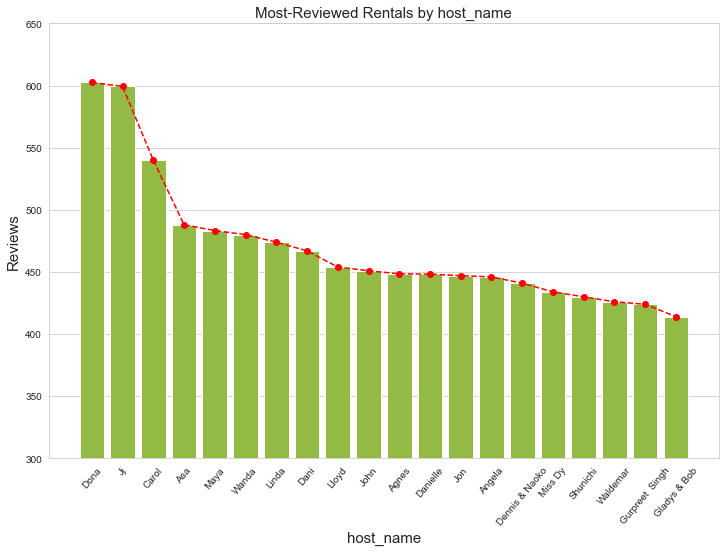

In [36]:
# Visualizing top 20 hosts and finding the reason behind it.

most_review_host_df = air.sort_values('number_of_reviews',ascending=False)
top_reviewed_host_df = most_review_host_df.loc[:,['host_name','number_of_reviews']][:30]
top_reviewed_host_df = top_reviewed_host_df.groupby('host_name').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed_host_df['host_name'],y=top_reviewed_host_df['number_of_reviews'].values,color='yellowgreen',ax=ax)
plt.plot(top_reviewed_host_df['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('host_name',fontsize='15')
plt.ylim((300,650))
for ax in ax.get_xticklabels():
  ax.set_rotation(50)
plt.title('Most-Reviewed Rentals by host_name',fontsize='15')
plt.show()
sns.set()



In [37]:
top_host=top_reviewed_host_df['host_name'].tolist()

In [38]:
top_host_dict={}
for elem in top_host:
  avg_price=air[air['host_name']==elem].price.mean()
  top_host_dict[elem]=avg_price

top_host_avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host', 'avg_price'])
top_host_avg_price_df.set_index('Host', inplace=True)
# top_host_avg_price_df

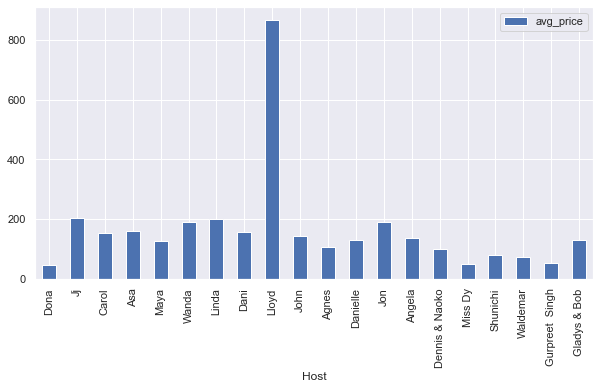

In [39]:
top_host_avg_price_df.plot(kind='bar')

plt.show()

In [40]:
# Almost every popular host have rental listings in the price range between 50 and 200.

In [41]:
most_reviews = air.nlargest(10, 'number_of_reviews')
most_reviews

price_average = most_reviews['price'].mean()
print("Average price per night is: ", price_average)



Average price per night is:  65.4


In [42]:
air['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [43]:
air['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64